# IMPORT LIBRARIES

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [7]:
nrows=20000

# DATA UPLOADING

In [9]:
df = pd.read_csv("E:\\python course\\relative humidity predictor\\relative-humidity-data.csv",nrows=nrows)

# DATA PREPROCESSING

In [10]:
df = df.drop('Date', axis=1)

In [11]:
df.fillna(method='bfill', inplace=True)
df

,Wind Speed(m/s),Temperature©,Dew PointTemp C),Wet Bulb Temp(C) Temperature,Max Temperature(C),Min Temperature ©,Precipitation(mm/day),Pressure (kPa),Relative Humidity (%)
0,0.74,16.48,-8.07,4.20,25.15,7.82,0.00,99.23,18.56
1,0.79,17.42,-8.37,4.52,24.90,11.40,0.00,99.22,16.50
2,1.39,14.95,-9.02,2.97,24.69,8.79,0.00,99.07,18.62
3,1.51,14.46,-8.91,2.77,24.51,6.95,0.00,99.06,19.75
4,1.60,14.60,-8.56,3.02,24.58,7.50,0.00,99.17,20.00
...,...,...,...,...,...,...,...,...,...
8516,0.95,28.97,9.47,19.22,35.35,22.81,0.00,98.37,31.38
8517,1.40,30.94,9.59,20.26,39.10,23.40,0.00,98.29,29.06
8518,1.32,30.00,12.87,21.44,37.01,22.67,0.01,98.41,38.00
8519,2.07,27.96,16.05,22.00,33.30,23.88,1.57,98.32,49.88


In [12]:
x=df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
x

,Wind Speed(m/s),Temperature©,Dew PointTemp C),Wet Bulb Temp(C) Temperature,Max Temperature(C),Min Temperature ©,Precipitation(mm/day),Pressure (kPa)
0,0.74,16.48,-8.07,4.20,25.15,7.82,0.00,99.23
1,0.79,17.42,-8.37,4.52,24.90,11.40,0.00,99.22
2,1.39,14.95,-9.02,2.97,24.69,8.79,0.00,99.07
3,1.51,14.46,-8.91,2.77,24.51,6.95,0.00,99.06
4,1.60,14.60,-8.56,3.02,24.58,7.50,0.00,99.17
...,...,...,...,...,...,...,...,...
8516,0.95,28.97,9.47,19.22,35.35,22.81,0.00,98.37
8517,1.40,30.94,9.59,20.26,39.10,23.40,0.00,98.29
8518,1.32,30.00,12.87,21.44,37.01,22.67,0.01,98.41
8519,2.07,27.96,16.05,22.00,33.30,23.88,1.57,98.32


In [14]:
x.isnull().sum()

 Wind Speed(m/s)                 0
Temperature©                     0
Dew PointTemp C)                 0
 Wet Bulb Temp(C) Temperature    0
Max  Temperature(C)              0
 Min Temperature ©               0
 Precipitation(mm/day)           0
 Pressure (kPa)                  0
dtype: int64

In [15]:
y.isnull().sum()

0

In [16]:
print(y.shape)
print(x.shape)

(8521,)
(8521, 8)


In [17]:
y = y.astype(str)
x = x.astype(str)

# DATA VISULAIZATION

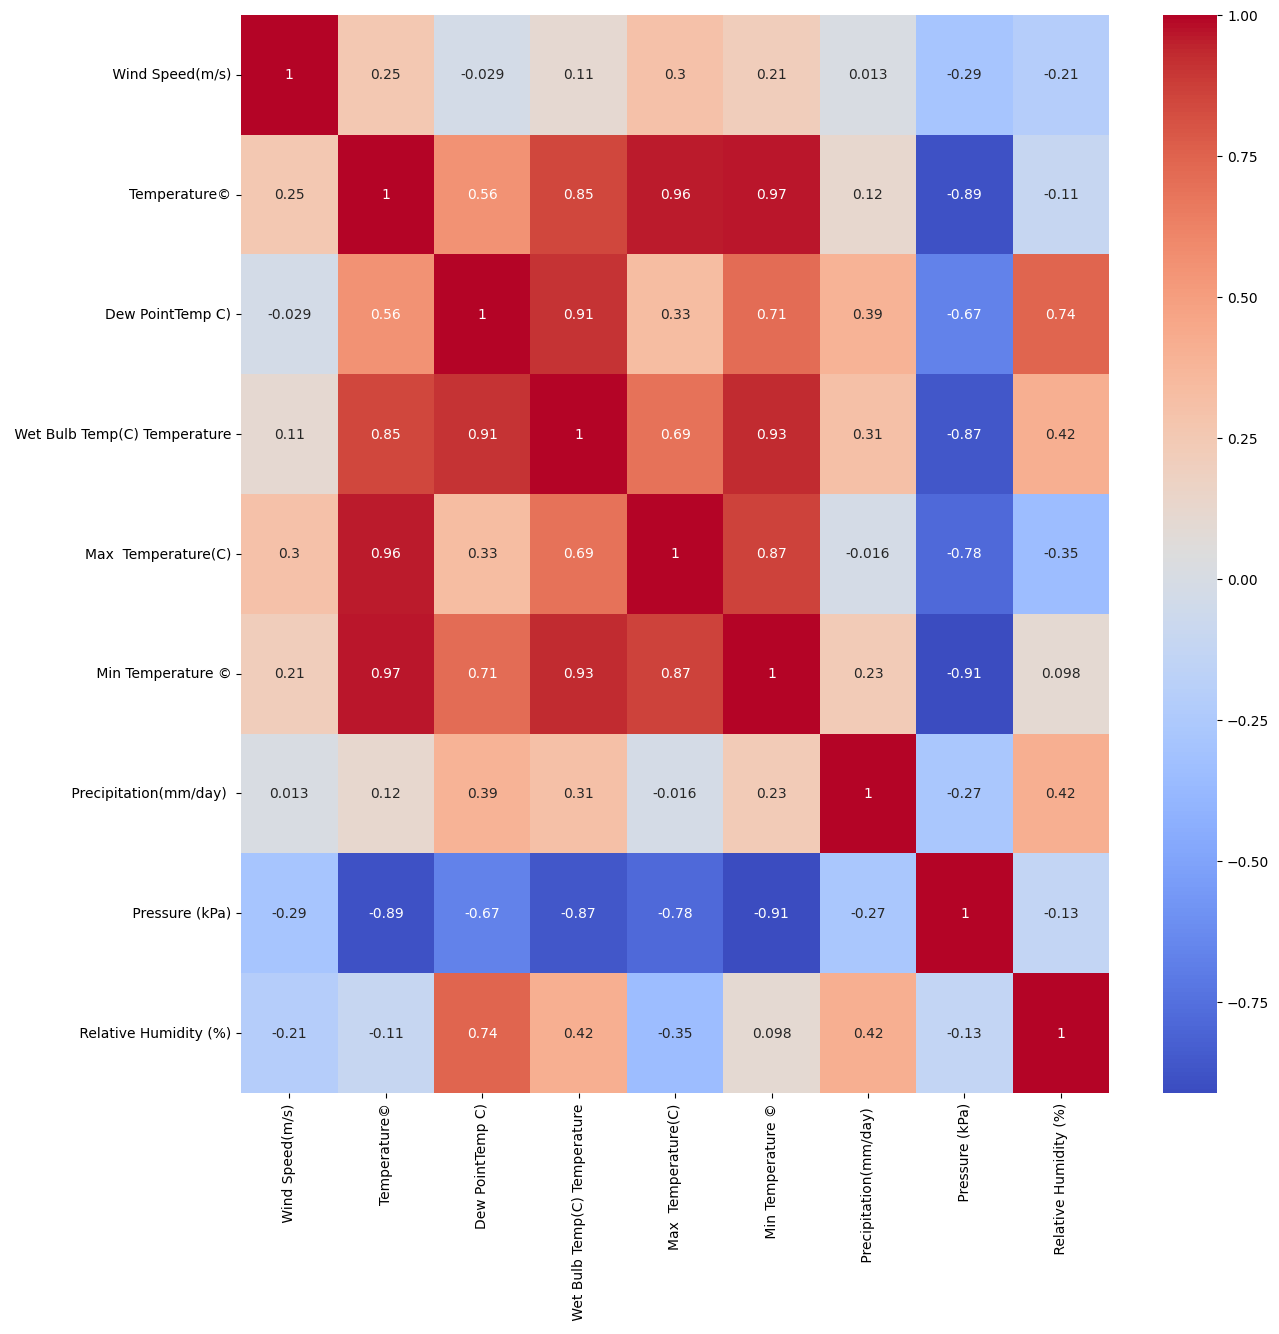

In [18]:
corr_matrix = df.corr(numeric_only=True)
# plot the correlation matrix using seaborn
plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# show the plot
plt.show()

# DATA SPLITING

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 42)

# FEATURE ENGINEERING

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)
df_scaled = pd.DataFrame(scaled_data, columns=x.columns)
df_scaled.head()

,Wind Speed(m/s),Temperature©,Dew PointTemp C),Wet Bulb Temp(C) Temperature,Max Temperature(C),Min Temperature ©,Precipitation(mm/day),Pressure (kPa)
0,-1.473226,-1.165072,-1.883602,-1.773590,-1.088105,-1.385468,-0.325521,1.216692
1,-1.410477,-1.043862,-1.914087,-1.732436,-1.123184,-0.945064,-0.325521,1.202238
2,-0.657491,-1.362362,-1.980138,-1.931777,-1.152650,-1.266140,-0.325521,0.985434
3,-0.506894,-1.425547,-1.968960,-1.957499,-1.177907,-1.492493,-0.325521,0.970981
4,-0.393946,-1.407494,-1.933394,-1.925347,-1.168085,-1.424833,-0.325521,1.129970


In [21]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8521 entries, 0 to 8520
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Wind Speed(m/s)               8521 non-null   float64
 1   Temperature©                   8521 non-null   float64
 2   Dew PointTemp C)               8521 non-null   float64
 3    Wet Bulb Temp(C) Temperature  8521 non-null   float64
 4   Max  Temperature(C)            8521 non-null   float64
 5    Min Temperature ©             8521 non-null   float64
 6    Precipitation(mm/day)         8521 non-null   float64
 7    Pressure (kPa)                8521 non-null   float64
dtypes: float64(8)
memory usage: 532.7 KB


## PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=4)

In [24]:
pca.fit(scaled_data)

PCA(n_components=4)

In [25]:
principal_components = pca.transform(scaled_data)
percent_variation = pca.explained_variance_ratio_* 100
print(percent_variation)

[64.04323517 16.54979232 11.37500959  6.08080383]


In [26]:
total_var = pca.explained_variance_ratio_.sum() * 100
print(total_var)

98.0488408995486


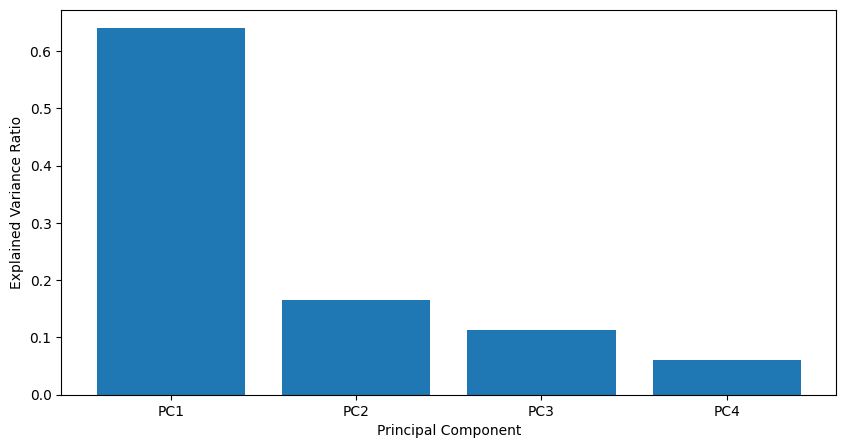

In [27]:
fig = plt.figure(figsize = (10, 5))
plt.bar(np.array(['PC1', 'PC2', 'PC3', 'PC4']), np.array(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks([0, 1, 2, 3])
plt.show()

In [28]:
xtrain_pca = pca.fit_transform(xtrain)
xtest_pca = pca.transform(xtest)

# CLASSIFIERS

### LINEAR REGRESSION

In [29]:
# Create a LinearRegression object
model_lr = LinearRegression()

# Fit the model to the data
model_lr.fit(xtrain_pca, ytrain)

r_squared = model_lr.score(xtrain_pca, ytrain)

print("R-squared:", r_squared)
# # Make predictions on new data
# new_data = [[16.9,16.1,13.6,1.8,130.0]]
# predictions = model_lr.predict(new_data)
# predictions

R-squared: 0.9532430364918285


### RANDOM FOREST REGRESSOR

In [ ]:
# Create a Random Forest Regressor object with hyperparameters
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training data
rf_reg.fit(xtrain_pca, ytrain)

# Predict the target values for the test data
y_pred = rf_reg.predict(xtest_pca)
r2 = r2_score(ytest, y_pred)
print(f"R-squared: {r2}")
# Compute the mean squared error (MSE) of the model on the test data
mse = mean_squared_error(ytest, y_pred)
mse

## SVR REGRESSOR

In [ ]:
# Create a SVM regression model
model_sv = SVR(kernel="rbf", C=1, epsilon=0.1)

# Fit the model on the training data
model_sv.fit(xtrain_pca, ytrain)

# Make predictions on the testing data
y_pred = model_sv.predict(xtest_pca)

# Evaluate the model using RMSE and R-squared
rmse = mean_squared_error(ytest, y_pred, squared=False)
r2 = r2_score(ytest, y_pred)
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

### DECISION TREE REGRESSOR

In [ ]:
# create a decision tree regression model
model_dt = DecisionTreeRegressor(random_state=42)

# fit the model to the training data
model_dt.fit(xtrain_pca, ytrain)

# make predictions on the test data
y_pred = model_dt.predict(xtest_pca)

# evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(ytest, y_pred)
print(f"R-squared: {r2}")

# HYPERPARAMETER TUNNING AND CROSS VALIDATION

### LINEAR REGRESSON

In [ ]:
# Define a range of hyperparameters to search over
param_grid = {
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "n_jobs": [-1]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(xtrain_pca, ytrain)

# Print the best hyperparameters and corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Use cross-validation to evaluate the model with best hyperparameters
scores = cross_val_score(grid_search.best_estimator_, x, y, cv=5)
print("Cross-validation scores: ", scores)
print("Average score: ", scores.mean())

### DECISION TREE

In [ ]:
# Define the parameter grid to search over
param_grid = {
    'max_depth': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(xtrain_pca, ytrain)

# Print the best hyperparameters and corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

### SVM

In [ ]:
# Create an SVM regression model with default hyperparameters
model_svr = SVR()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1],
    'gamma': [0.01],
    'kernel': ['linear']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model_svr, param_grid=param_grid, cv=5, n_jobs=1)
grid_search.fit(xtrain_pca, ytrain)

# Print the best hyperparameters and corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Evaluate the model on the test set
y_pred = grid_search.predict(xtest_pca)
mse = mean_squared_error(ytest, y_pred)
print("Mean squared error: ", mse)